# Requirements

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Add as many imports as you need.

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [120]:
data = pd.read_csv('blood_pressure_data.csv')
data

id         age  height(cm)  weight(kg)  relaxation  blood sugar  \
0          NaN         NaN       180.0        65.0        70.0          NaN   
1      57468.0    7/5/1979       150.0        50.0        88.0         92.0   
2      55209.0  11/27/1954       175.0        75.0         NaN          NaN   
3       3335.0   9/13/1984       160.0         NaN         NaN        100.0   
4      70782.0   8/15/1984       170.0         NaN        68.0         99.0   
...        ...         ...         ...         ...         ...          ...   
9995   43983.0         NaN       180.0        75.0        69.0        100.0   
9996   65781.0         NaN       160.0         NaN        72.0        100.0   
9997  125800.0    8/3/1989       165.0        65.0        72.0         83.0   
9998    6795.0         NaN       160.0        75.0        82.0         88.0   
9999       NaN  10/23/1989       170.0        70.0         NaN         93.0   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
0           149.0          NaN   NaN   87.0        13.9            1.0   
1           219.0          LOW   NaN  137.0        13.2            NaN   
2           217.0       NORMAL  50.0  142.0         NaN            1.0   
3           160.0         HiGH  48.0   84.0        12.1            1.0   
4           176.0          LOW   NaN   96.0        13.8            1.0   
...           ...          ...   ...    ...         ...            ...   
9995        180.0     ABNORMAL  76.0   98.0        14.7            NaN   
9996          NaN       NORMAL   NaN   99.0        15.3            1.0   
9997        207.0          NaN  65.0  134.0         NaN            1.0   
9998          NaN         HiGH  63.0  112.0        14.4            1.0   
9999          NaN          UNK   NaN  103.0        17.5            NaN   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
0                  NaN  19.0   NaN   NaN            No           112.0  
1                  0.6  26.0  17.0   NaN            No           138.0  
2                  0.8  22.0  22.0   NaN            No           137.0  
3                  0.6  15.0  19.0  14.0            No           133.0  
4                  0.9  33.0   NaN  11.0            No             NaN  
...                ...   ...   ...   ...           ...             ...  
9995               0.8  29.0  39.0  73.0            No           120.0  
9996               0.7  22.0  49.0  91.0            No           110.0  
9997               0.9  20.0  21.0  23.0            No           128.0  
9998               0.9  18.0  15.0  64.0            No           121.0  
9999               1.1  48.0   NaN  89.0           Yes           120.0  

[10000 rows x 18 columns]

Explore the dataset using visualizations of your choice.

In [121]:
data.isnull().sum() / len(data)*100

id                  26.72
age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

In [122]:
data.dropna(subset='blood pressure', inplace=True)

In [123]:
data

id         age  height(cm)  weight(kg)  relaxation  blood sugar  \
0          NaN         NaN       180.0        65.0        70.0          NaN   
1      57468.0    7/5/1979       150.0        50.0        88.0         92.0   
2      55209.0  11/27/1954       175.0        75.0         NaN          NaN   
3       3335.0   9/13/1984       160.0         NaN         NaN        100.0   
6     136057.0    8/1/1964       155.0        50.0        74.0          NaN   
...        ...         ...         ...         ...         ...          ...   
9995   43983.0         NaN       180.0        75.0        69.0        100.0   
9996   65781.0         NaN       160.0         NaN        72.0        100.0   
9997  125800.0    8/3/1989       165.0        65.0        72.0         83.0   
9998    6795.0         NaN       160.0        75.0        82.0         88.0   
9999       NaN  10/23/1989       170.0        70.0         NaN         93.0   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
0           149.0          NaN   NaN   87.0        13.9            1.0   
1           219.0          LOW   NaN  137.0        13.2            NaN   
2           217.0       NORMAL  50.0  142.0         NaN            1.0   
3           160.0         HiGH  48.0   84.0        12.1            1.0   
6             NaN          LOW  59.0    NaN        13.5            1.0   
...           ...          ...   ...    ...         ...            ...   
9995        180.0     ABNORMAL  76.0   98.0        14.7            NaN   
9996          NaN       NORMAL   NaN   99.0        15.3            1.0   
9997        207.0          NaN  65.0  134.0         NaN            1.0   
9998          NaN         HiGH  63.0  112.0        14.4            1.0   
9999          NaN          UNK   NaN  103.0        17.5            NaN   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
0                  NaN  19.0   NaN   NaN            No           112.0  
1                  0.6  26.0  17.0   NaN            No           138.0  
2                  0.8  22.0  22.0   NaN            No           137.0  
3                  0.6  15.0  19.0  14.0            No           133.0  
6                  0.7  44.0  28.0  17.0            No           138.0  
...                ...   ...   ...   ...           ...             ...  
9995               0.8  29.0  39.0  73.0            No           120.0  
9996               0.7  22.0  49.0  91.0            No           110.0  
9997               0.9  20.0  21.0  23.0            No           128.0  
9998               0.9  18.0  15.0  64.0            No           121.0  
9999               1.1  48.0   NaN  89.0           Yes           120.0  

[7477 rows x 18 columns]

In [124]:
data.drop('id', axis=1, inplace=True)

<Axes: >

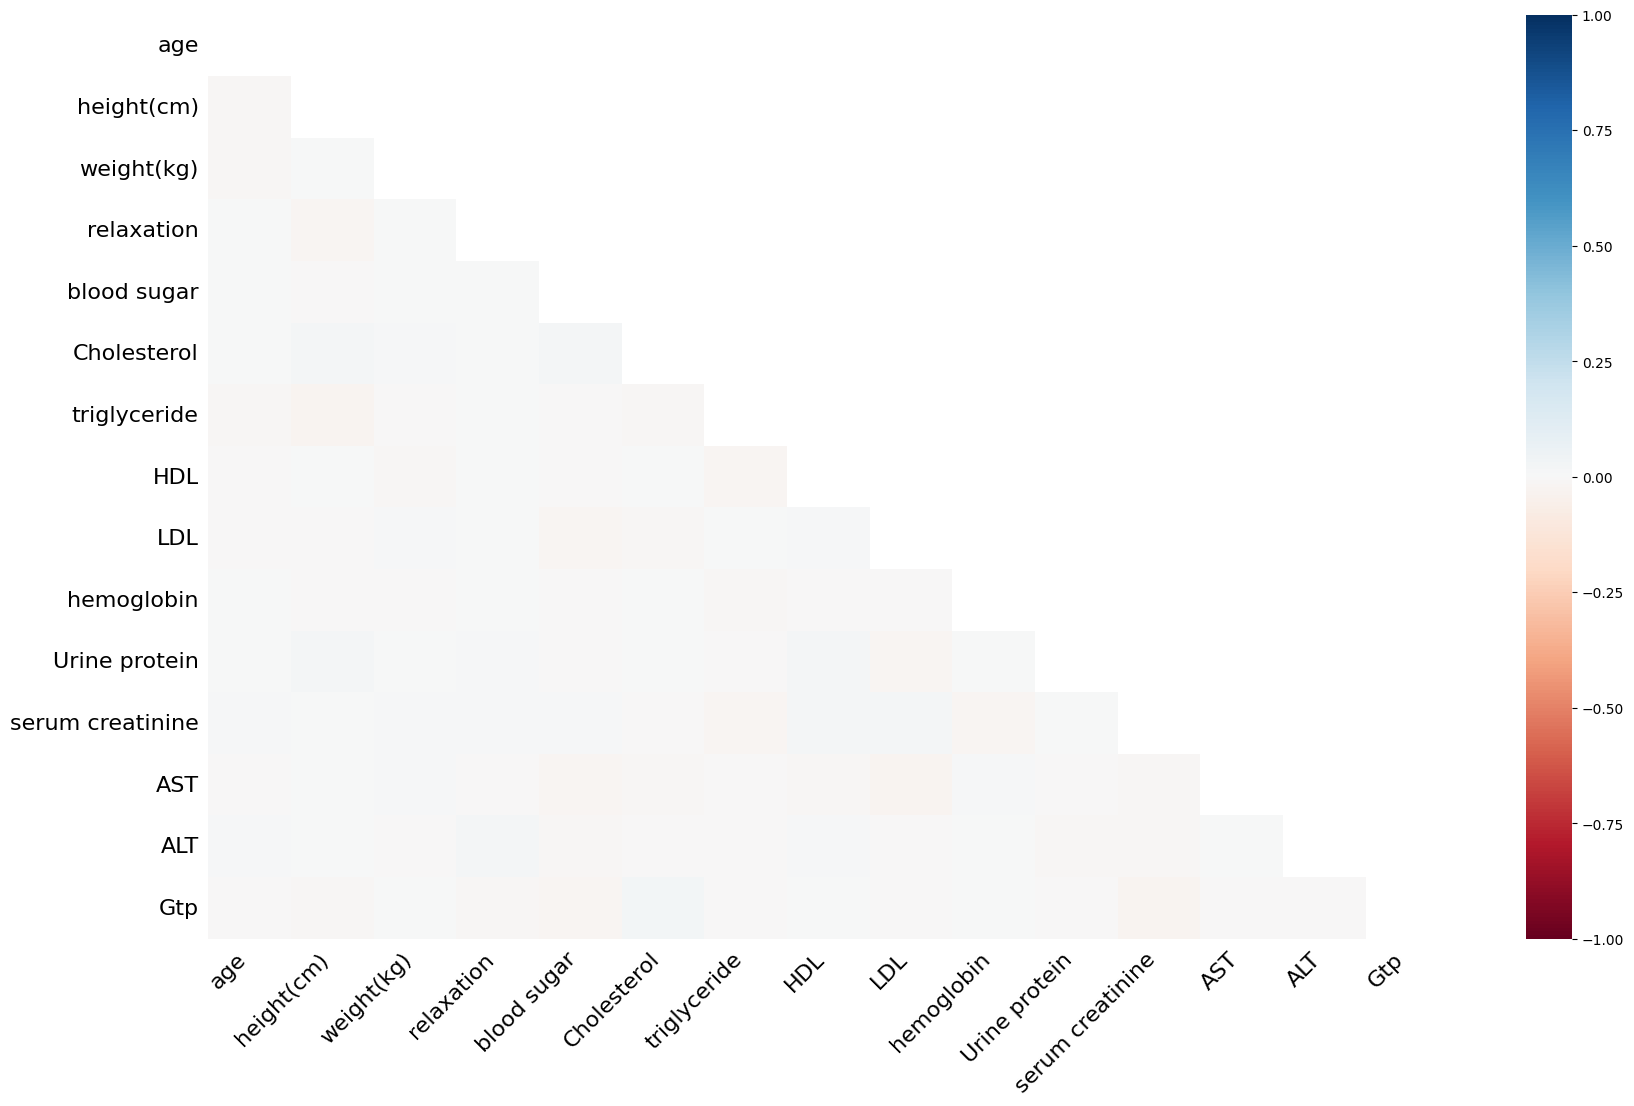

In [14]:
msno.heatmap(data)

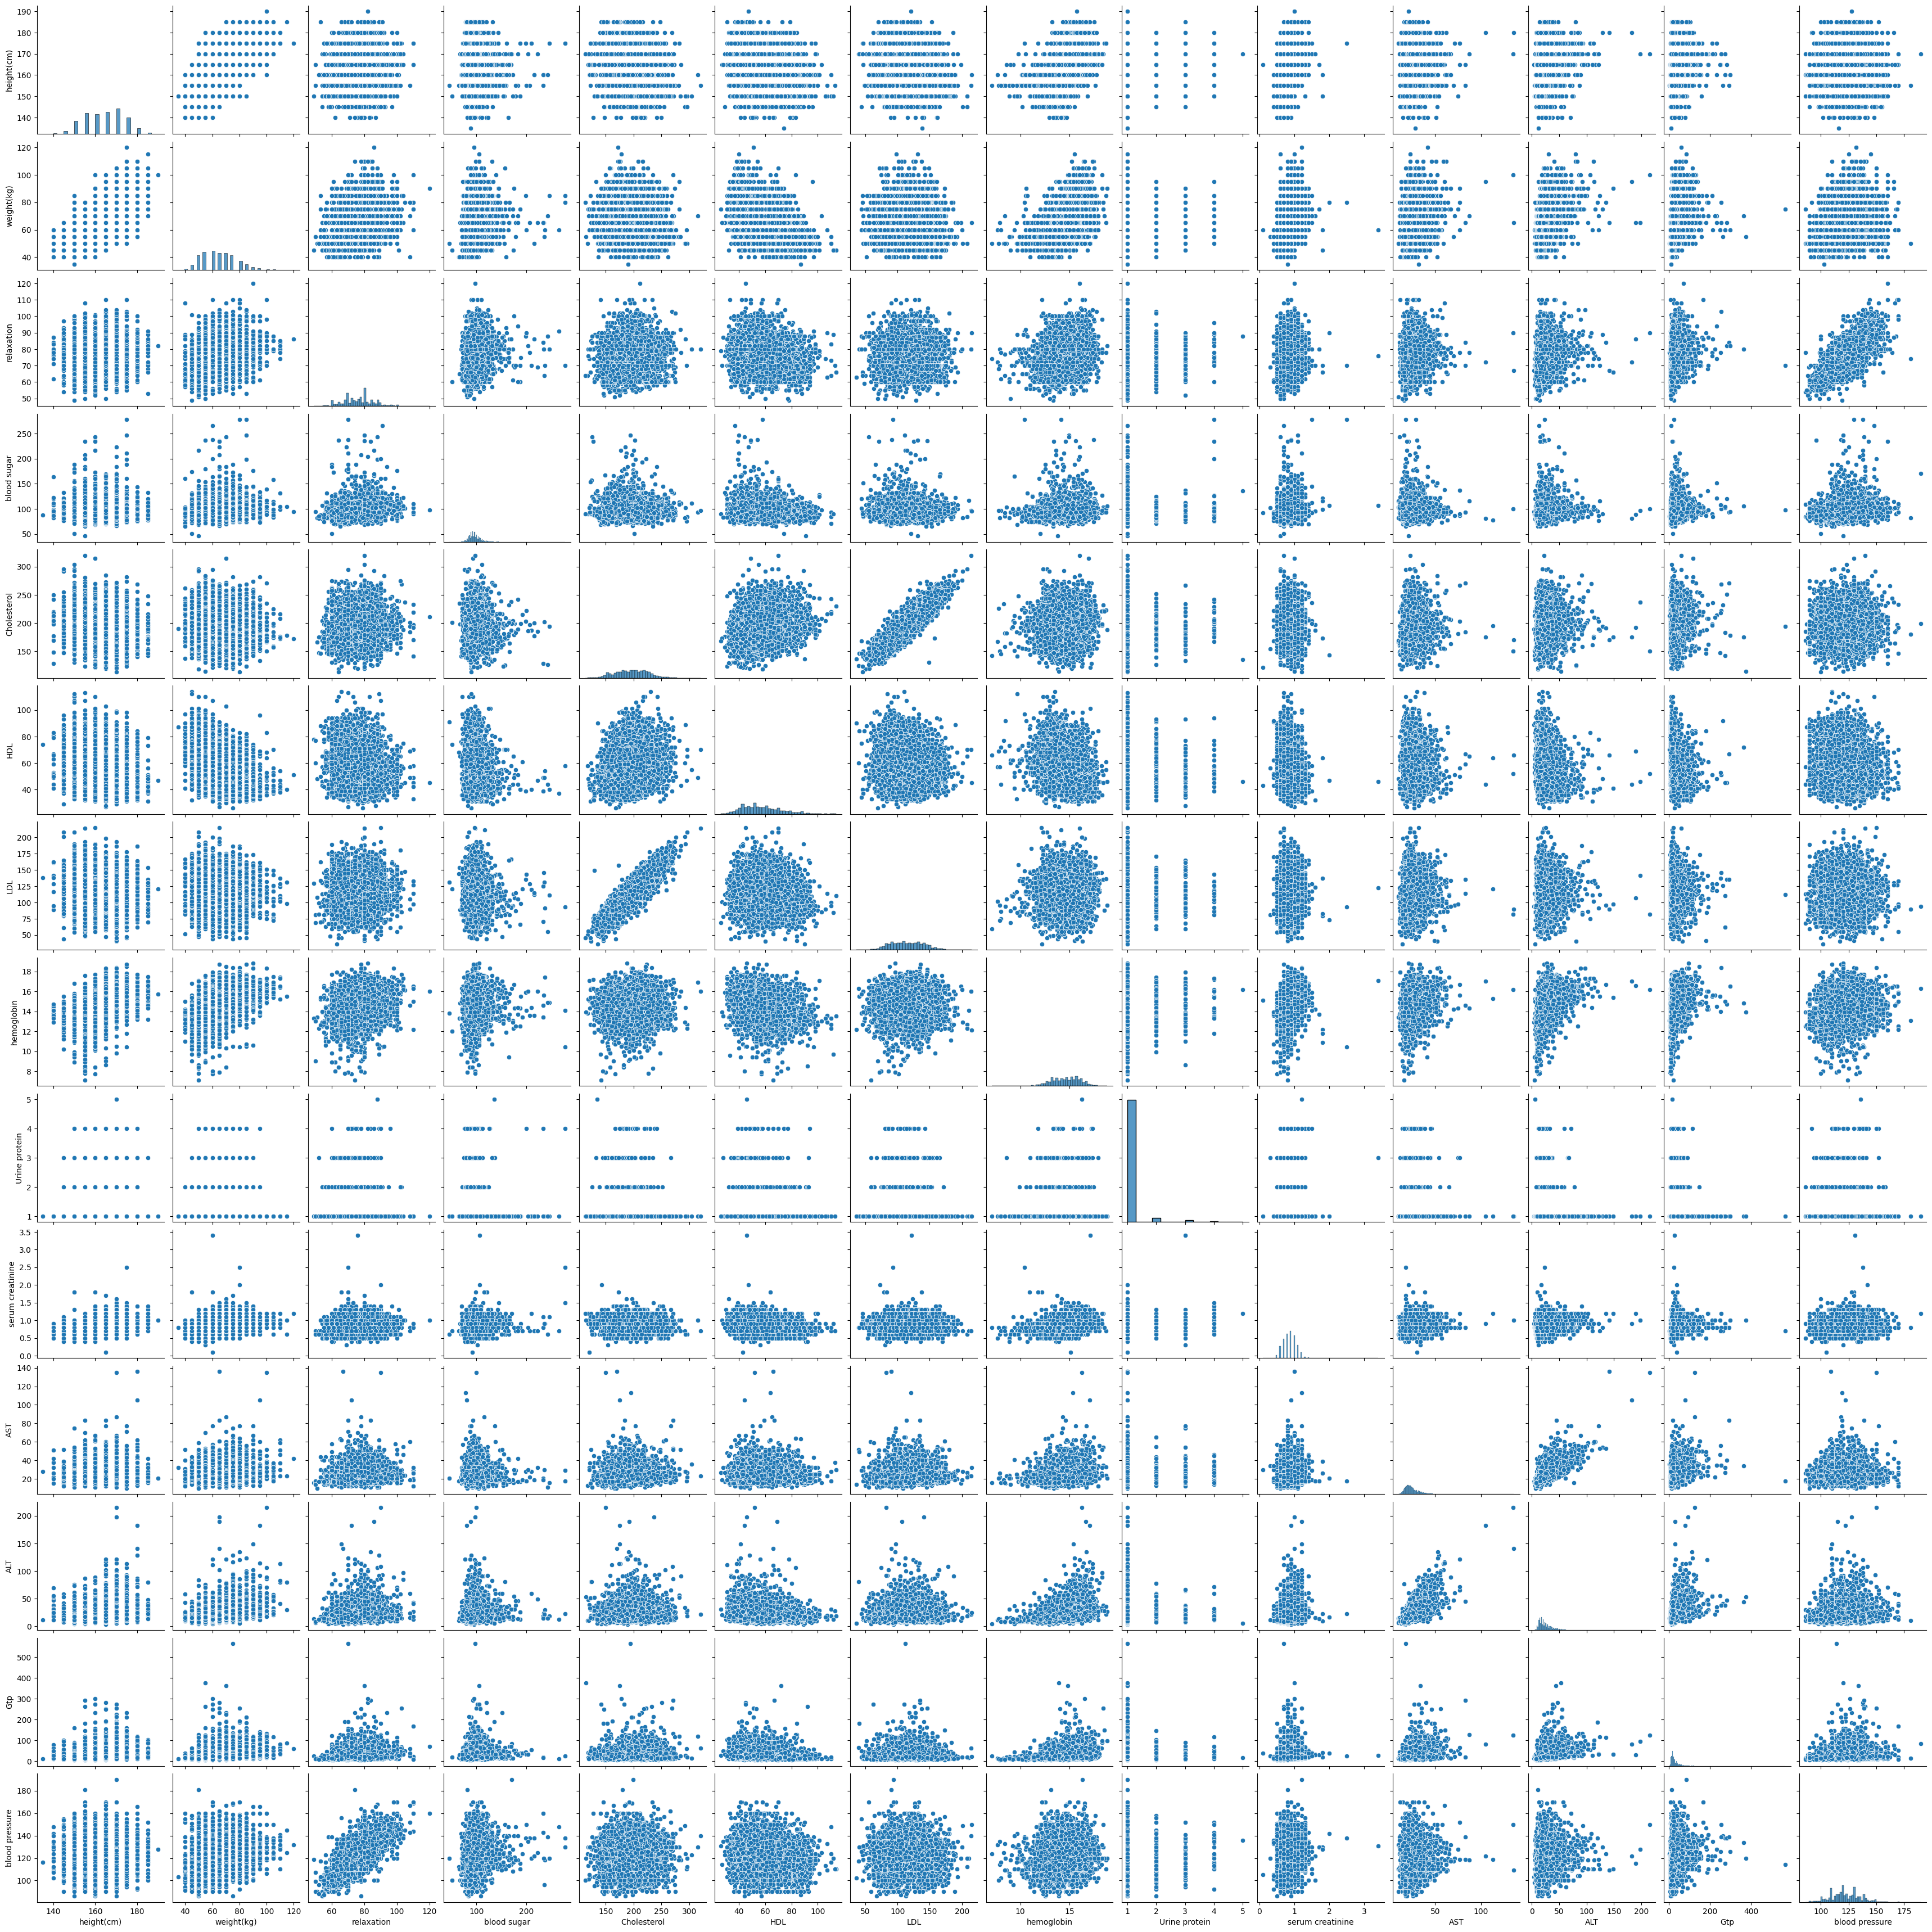

In [15]:
import seaborn as sns
sns.pairplot(data)    

In [86]:
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

age: [nan '7/5/1979' '11/27/1954' ... '12/27/1988' '11/8/1989' '7/2/1954']
height(cm): [180. 150. 175. 160. 155. 165.  nan 170. 145. 185. 140. 190. 135.]
weight(kg): [ 65.  50.  75.  nan  60.  70.  35.  55.  85.  80.  95.  40. 100.  90.
  45. 110. 105. 120. 115.]
relaxation: [ 70.  88.  nan  74.  80.  78.  60.  79.  68. 100.  96.  85.  76.  92.
  93.  86.  72.  81.  82.  71.  66.  62.  77.  64.  90.  67.  84.  65.
  63.  75.  61.  83.  89.  91.  69.  97.  73.  87.  94.  57.  51.  55.
  99.  58.  95.  98.  56.  59.  53.  54. 110. 101. 102. 103.  49. 108.
  50. 105. 120. 104.  52.]
blood sugar: [ nan  92. 100.  94.  82. 238.  91.  93.  87.  96. 105.  90. 152.  95.
 101.  77. 108. 121.  99. 155.  86. 122. 109.  97.  98.  83. 107. 112.
 114.  84.  89. 110.  85.  78.  81. 102. 106. 123.  88. 116.  79. 104.
  73. 125. 120. 103. 143.  76. 111. 154. 131. 139. 117. 189. 119. 124.
  80.  70.  74. 115. 113. 118.  67. 160. 126.  75.  69. 129. 145. 188.
 137. 133. 128. 144.  71. 177. 266. 140. 132.

In [125]:
data['age'] = pd.to_datetime(data['age']).dt.year
data
current_year = pd.to_datetime("today").year
data['age'] = current_year - data['age']

In [126]:
data

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
0      NaN       180.0        65.0        70.0          NaN        149.0   
1     45.0       150.0        50.0        88.0         92.0        219.0   
2     70.0       175.0        75.0         NaN          NaN        217.0   
3     40.0       160.0         NaN         NaN        100.0        160.0   
6     60.0       155.0        50.0        74.0          NaN          NaN   
...    ...         ...         ...         ...          ...          ...   
9995   NaN       180.0        75.0        69.0        100.0        180.0   
9996   NaN       160.0         NaN        72.0        100.0          NaN   
9997  35.0       165.0        65.0        72.0         83.0        207.0   
9998   NaN       160.0        75.0        82.0         88.0          NaN   
9999  35.0       170.0        70.0         NaN         93.0          NaN   

     triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
0             NaN   NaN   87.0        13.9            1.0               NaN   
1             LOW   NaN  137.0        13.2            NaN               0.6   
2          NORMAL  50.0  142.0         NaN            1.0               0.8   
3            HiGH  48.0   84.0        12.1            1.0               0.6   
6             LOW  59.0    NaN        13.5            1.0               0.7   
...           ...   ...    ...         ...            ...               ...   
9995     ABNORMAL  76.0   98.0        14.7            NaN               0.8   
9996       NORMAL   NaN   99.0        15.3            1.0               0.7   
9997          NaN  65.0  134.0         NaN            1.0               0.9   
9998         HiGH  63.0  112.0        14.4            1.0               0.9   
9999          UNK   NaN  103.0        17.5            NaN               1.1   

       AST   ALT   Gtp dental caries  blood pressure  
0     19.0   NaN   NaN            No           112.0  
1     26.0  17.0   NaN            No           138.0  
2     22.0  22.0   NaN            No           137.0  
3     15.0  19.0  14.0            No           133.0  
6     44.0  28.0  17.0            No           138.0  
...    ...   ...   ...           ...             ...  
9995  29.0  39.0  73.0            No           120.0  
9996  22.0  49.0  91.0            No           110.0  
9997  20.0  21.0  23.0            No           128.0  
9998  18.0  15.0  64.0            No           121.0  
9999  48.0   NaN  89.0           Yes           120.0  

[7477 rows x 17 columns]

In [127]:
columns = ['triglyceride', 'dental caries']
from sklearn.preprocessing import OrdinalEncoder    

encoder = OrdinalEncoder()
data[columns] = encoder.fit_transform(data[columns]) 

data

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
0      NaN       180.0        65.0        70.0          NaN        149.0   
1     45.0       150.0        50.0        88.0         92.0        219.0   
2     70.0       175.0        75.0         NaN          NaN        217.0   
3     40.0       160.0         NaN         NaN        100.0        160.0   
6     60.0       155.0        50.0        74.0          NaN          NaN   
...    ...         ...         ...         ...          ...          ...   
9995   NaN       180.0        75.0        69.0        100.0        180.0   
9996   NaN       160.0         NaN        72.0        100.0          NaN   
9997  35.0       165.0        65.0        72.0         83.0        207.0   
9998   NaN       160.0        75.0        82.0         88.0          NaN   
9999  35.0       170.0        70.0         NaN         93.0          NaN   

      triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
0              NaN   NaN   87.0        13.9            1.0               NaN   
1              2.0   NaN  137.0        13.2            NaN               0.6   
2              3.0  50.0  142.0         NaN            1.0               0.8   
3              1.0  48.0   84.0        12.1            1.0               0.6   
6              2.0  59.0    NaN        13.5            1.0               0.7   
...            ...   ...    ...         ...            ...               ...   
9995           0.0  76.0   98.0        14.7            NaN               0.8   
9996           3.0   NaN   99.0        15.3            1.0               0.7   
9997           NaN  65.0  134.0         NaN            1.0               0.9   
9998           1.0  63.0  112.0        14.4            1.0               0.9   
9999           4.0   NaN  103.0        17.5            NaN               1.1   

       AST   ALT   Gtp  dental caries  blood pressure  
0     19.0   NaN   NaN            0.0           112.0  
1     26.0  17.0   NaN            0.0           138.0  
2     22.0  22.0   NaN            0.0           137.0  
3     15.0  19.0  14.0            0.0           133.0  
6     44.0  28.0  17.0            0.0           138.0  
...    ...   ...   ...            ...             ...  
9995  29.0  39.0  73.0            0.0           120.0  
9996  22.0  49.0  91.0            0.0           110.0  
9997  20.0  21.0  23.0            0.0           128.0  
9998  18.0  15.0  64.0            0.0           121.0  
9999  48.0   NaN  89.0            1.0           120.0  

[7477 rows x 17 columns]

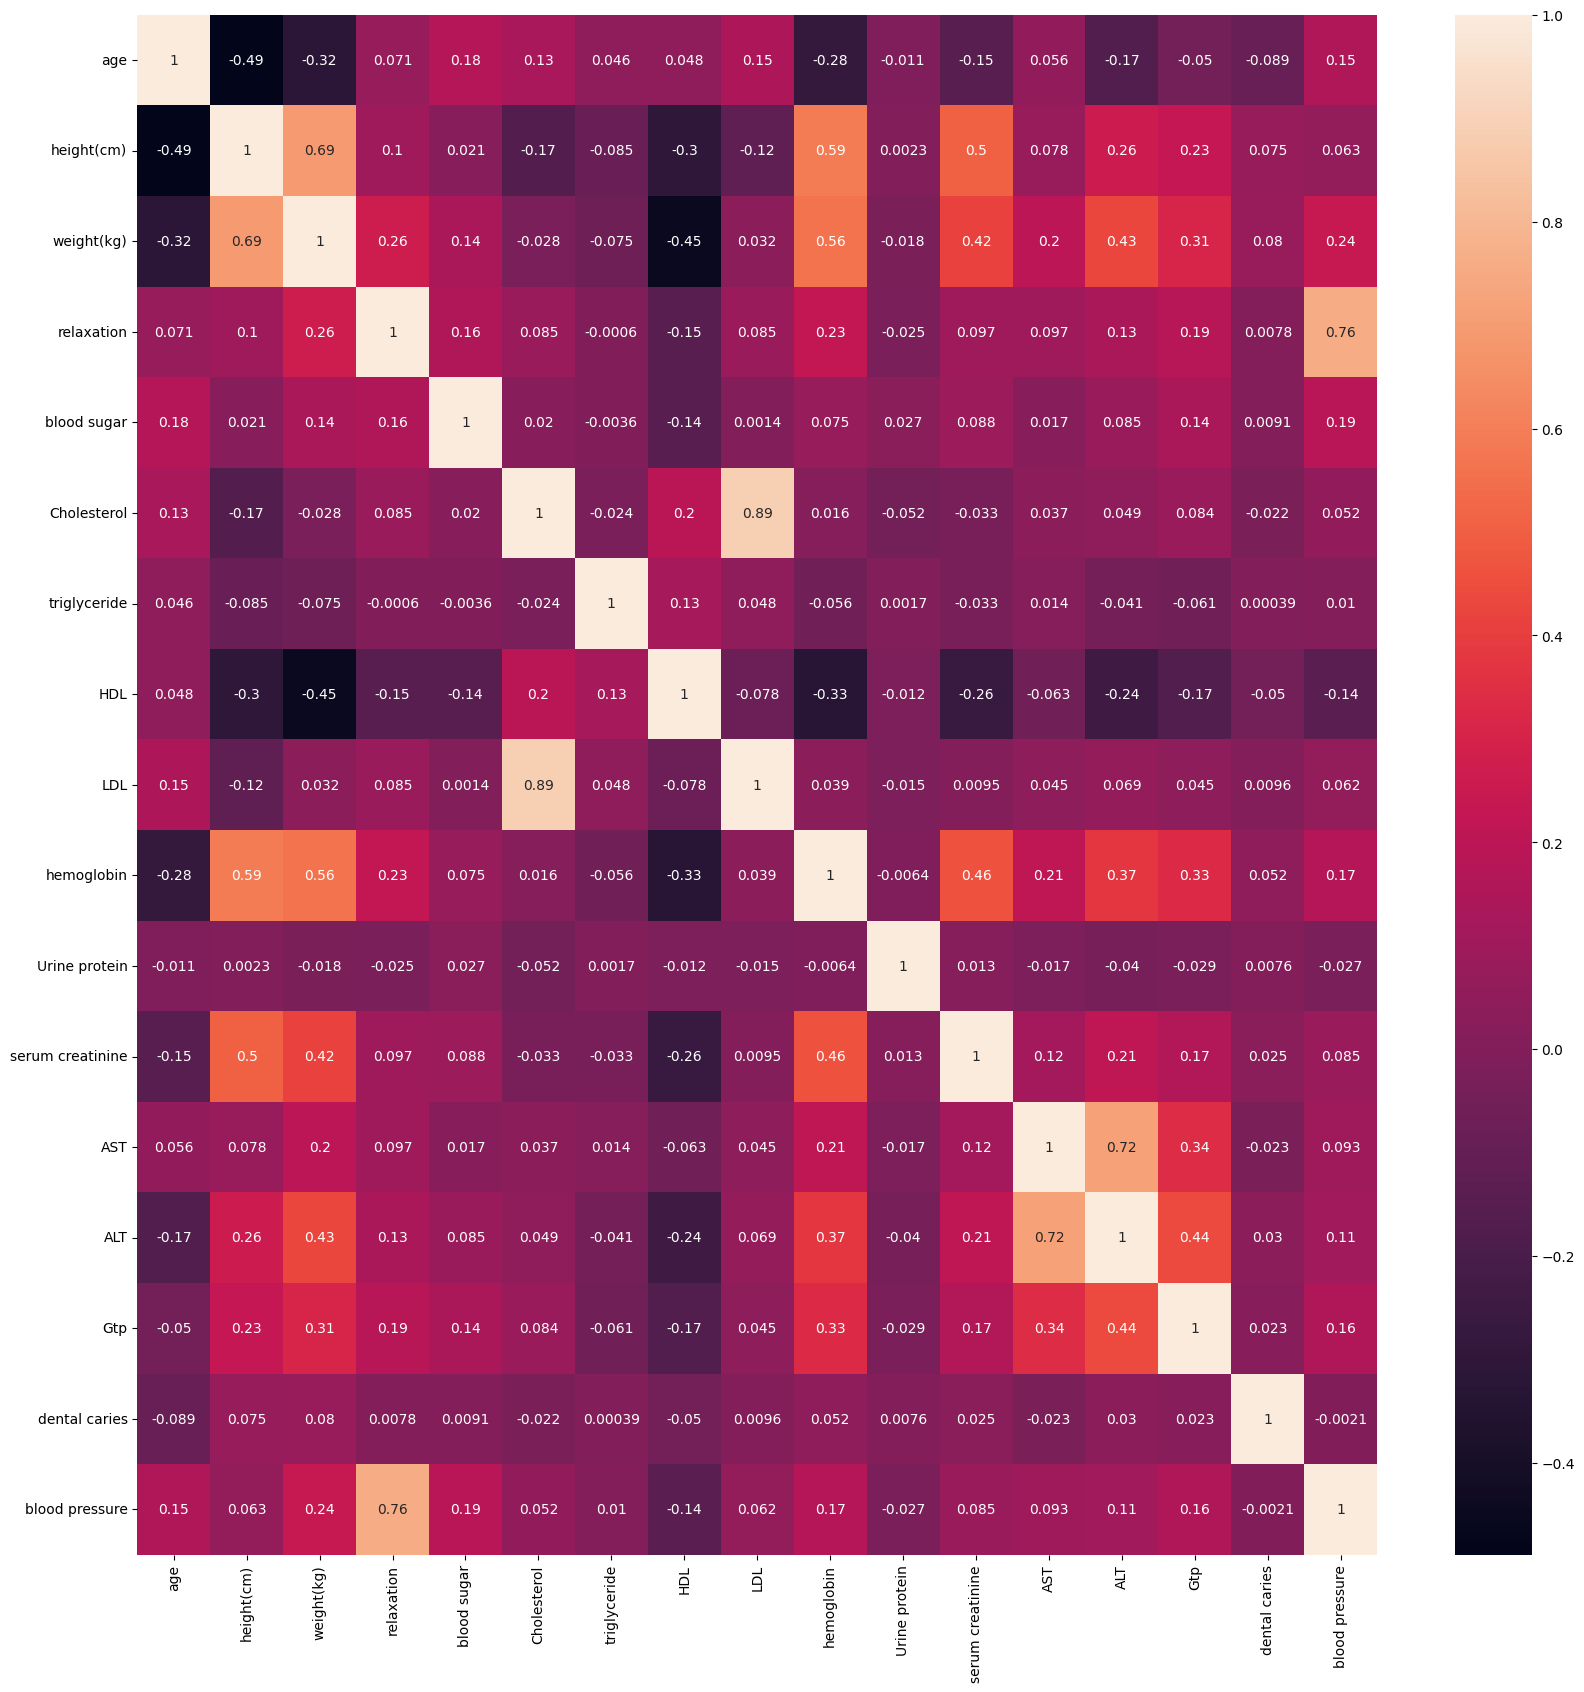

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))    
sns.heatmap(data.corr(), annot=True)
plt.show()

In [128]:
rlbp = ['relaxation', 'blood pressure'] 
alst = ['ALT', 'AST']
chdt = ['Cholesterol', 'LDL']
hbgl = ['hemoglobin', 'height(cm)', 'weight(kg)']
list_all = [rlbp, alst, chdt, hbgl]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

for list in list_all:
    imputer = IterativeImputer(random_state=42)
    data[list] = imputer.fit_transform(data[list])

<Axes: ylabel='Frequency'>

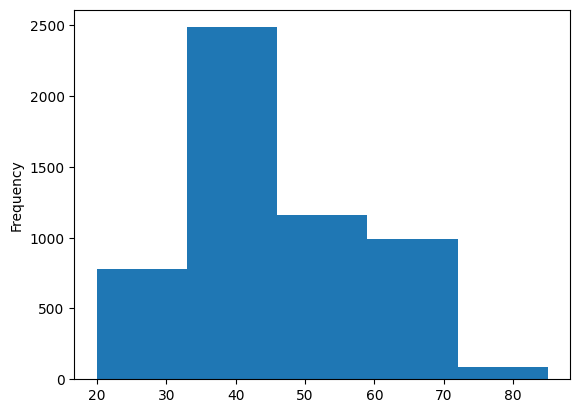

In [129]:
data['age'].plot.hist(bins=5)

<Axes: ylabel='Frequency'>

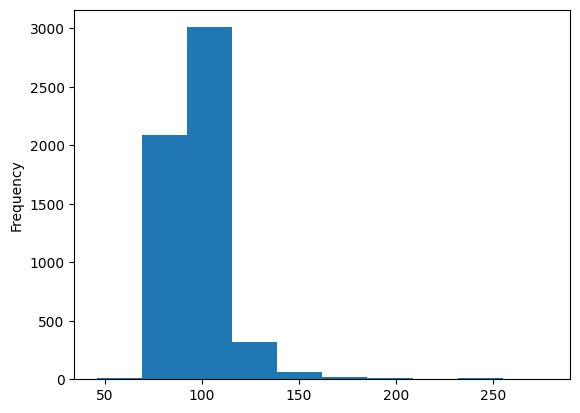

In [109]:
data['blood sugar'].plot.hist(bins=10)

In [130]:
from sklearn.impute import SimpleImputer

list = ['age', 'blood sugar', 'HDL', 'Urine protein', 'serum creatinine', 'Gtp']
for column in list:
    imputer = SimpleImputer(strategy='median')
    data[column] = imputer.fit_transform(data[[column]])

<Axes: ylabel='Frequency'>

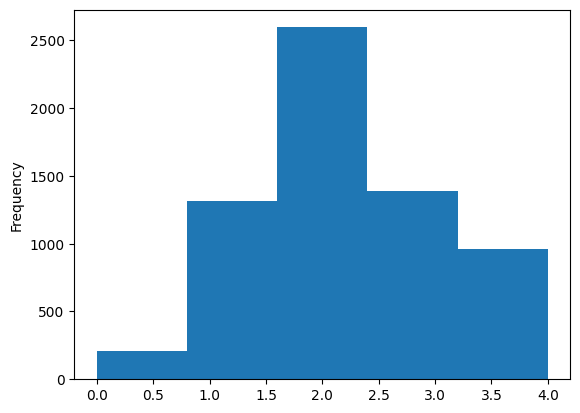

In [113]:
data['triglyceride'].plot.hist(bins=5)

In [131]:
imputer = SimpleImputer(strategy='most_frequent')
data['triglyceride'] = imputer.fit_transform(data[['triglyceride']])

In [132]:
data

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
0     45.0       180.0   65.000000   70.000000         95.0   149.000000   
1     45.0       150.0   50.000000   88.000000         92.0   219.000000   
2     70.0       175.0   75.000000   84.384052         95.0   217.000000   
3     40.0       160.0   57.713824   82.263562        100.0   160.000000   
6     60.0       155.0   50.000000   74.000000         95.0   196.512416   
...    ...         ...         ...         ...          ...          ...   
9995  45.0       180.0   75.000000   69.000000        100.0   180.000000   
9996  45.0       160.0   63.338052   72.000000        100.0   179.681942   
9997  35.0       165.0   65.000000   72.000000         83.0   207.000000   
9998  45.0       160.0   75.000000   82.000000         88.0   192.935949   
9999  35.0       170.0   70.000000   75.371971         93.0   183.760098   

      triglyceride   HDL         LDL  hemoglobin  Urine protein  \
0              2.0  55.0   87.000000   13.900000            1.0   
1              2.0  55.0  137.000000   13.200000            1.0   
2              3.0  50.0  142.000000   15.726328            1.0   
3              1.0  48.0   84.000000   12.100000            1.0   
6              2.0  59.0  115.508094   13.500000            1.0   
...            ...   ...         ...         ...            ...   
9995           0.0  76.0   98.000000   14.700000            1.0   
9996           3.0  55.0   99.000000   15.300000            1.0   
9997           2.0  65.0  134.000000   14.652798            1.0   
9998           1.0  63.0  112.000000   14.400000            1.0   
9999           4.0  55.0  103.000000   17.500000            1.0   

      serum creatinine   AST        ALT   Gtp  dental caries  blood pressure  
0                  0.9  19.0  16.321540  24.0            0.0           112.0  
1                  0.6  26.0  17.000000  24.0            0.0           138.0  
2                  0.8  22.0  22.000000  24.0            0.0           137.0  
3                  0.6  15.0  19.000000  14.0            0.0           133.0  
6                  0.7  44.0  28.000000  17.0            0.0           138.0  
...                ...   ...        ...   ...            ...             ...  
9995               0.8  29.0  39.000000  73.0            0.0           120.0  
9996               0.7  22.0  49.000000  91.0            0.0           110.0  
9997               0.9  20.0  21.000000  23.0            0.0           128.0  
9998               0.9  18.0  15.000000  64.0            0.0           121.0  
9999               1.1  48.0  57.812832  89.0            1.0           120.0  

[7477 rows x 17 columns]

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [138]:
from sklearn.preprocessing import MinMaxScaler

list_all = [column for column in data.columns if column not in ['dental caries', 'triglyceride']]

scaler = MinMaxScaler()
for column in list_all:
    data[column] = scaler.fit_transform(data[[column]])

data

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
0     0.384615    0.781404    0.397714    0.295775     0.211207     0.173913   
1     0.384615    0.260468    0.233454    0.549296     0.198276     0.512077   
2     0.769231    0.694581    0.507220    0.498367     0.211207     0.502415   
3     0.307692    0.434113    0.317925    0.468501     0.232759     0.227053   
6     0.615385    0.347291    0.233454    0.352113     0.211207     0.403442   
...        ...         ...         ...         ...          ...          ...   
9995  0.384615    0.781404    0.507220    0.281690     0.232759     0.323671   
9996  0.384615    0.434113    0.379514    0.323944     0.232759     0.322135   
9997  0.230769    0.520936    0.397714    0.323944     0.159483     0.454106   
9998  0.384615    0.434113    0.507220    0.464789     0.181034     0.386164   
9999  0.230769    0.607758    0.452467    0.371436     0.202586     0.341836   

      triglyceride       HDL       LDL  hemoglobin  Urine protein  \
0              2.0  0.329545  0.283407    0.581197            0.0   
1              2.0  0.329545  0.561258    0.521368            0.0   
2              3.0  0.272727  0.589043    0.737293            0.0   
3              1.0  0.250000  0.266736    0.427350            0.0   
6              2.0  0.375000  0.441827    0.547009            0.0   
...            ...       ...       ...         ...            ...   
9995           0.0  0.568182  0.344535    0.649573            0.0   
9996           3.0  0.329545  0.350092    0.700855            0.0   
9997           2.0  0.443182  0.544587    0.645538            0.0   
9998           1.0  0.420455  0.422333    0.623932            0.0   
9999           4.0  0.329545  0.372320    0.888889            0.0   

      serum creatinine       AST       ALT       Gtp  dental caries  \
0             0.242424  0.071429  0.060866  0.033868            0.0   
1             0.151515  0.126984  0.064073  0.033868            0.0   
2             0.212121  0.095238  0.087708  0.033868            0.0   
3             0.151515  0.039683  0.073527  0.016043            0.0   
6             0.181818  0.269841  0.116069  0.021390            0.0   
...                ...       ...       ...       ...            ...   
9995          0.212121  0.150794  0.168065  0.121212            0.0   
9996          0.181818  0.095238  0.215334  0.153298            0.0   
9997          0.242424  0.079365  0.082981  0.032086            0.0   
9998          0.242424  0.063492  0.054620  0.105169            0.0   
9999          0.303030  0.301587  0.256992  0.149733            1.0   

      blood pressure  
0           0.250000  
1           0.500000  
2           0.490385  
3           0.451923  
6           0.500000  
...              ...  
9995        0.326923  
9996        0.230769  
9997        0.403846  
9998        0.336538  
9999        0.326923  

[7477 rows x 17 columns]

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [139]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split

In [141]:
x, y = data.drop('blood pressure', axis=1), data['blood pressure']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=52)

model = RandomForestRegressor(random_state=52)
model1 = XGBRegressor(random_state=52)

param_grid1 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5],
    'criterion': ['squared_error', 'absolute_error'],
}

param_grid2 = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5],
}

grid = GridSearchCV(model, param_grid1, cv=KFold(n_splits=5))

grid1 = GridSearchCV(model1, param_grid2, cv=KFold(n_splits=5))

grid.fit(train_x, train_y)
grid1.fit(train_x, train_y)

print(grid.best_params_)
print(grid1.best_params_)

{'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 100}
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


In [150]:
best_model1 = grid.best_estimator_
best_model2 = grid1.best_estimator_

from sklearn.metrics import r2_score

pred1 = best_model1.predict(test_x)
pred2 = best_model2.predict(test_x)

print(r2_score(pred1, test_y))
print(r2_score(pred2, test_y))

print(grid.best_score_)
print(grid1.best_score_)

0.5591450427884073
0.5649111625981265
0.6684257054344283
0.6738838719516878


# Cross-Validation

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.